In [1]:
######################################## Unsupervised Learning ##################################################################

In [2]:
#Import ‘inpFle_BCCP.csv’ into a Pandas DataFrame, called ‘inpDf’, set the separator as a comma, the header at 0, and the index_col at 0.

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

InpPath = r"C:\Users\ciana\OneDrive\Documents\DCU\Final Year\MT412 - Professional Business Analytics\inpFle_BCCP.csv"
InpDf = pd.read_csv(r"C:\Users\ciana\OneDrive\Documents\DCU\Final Year\MT412 - Professional Business Analytics\inpFle_BCCP.csv", sep=',', header=0, index_col=0)

InpDf

,credit_score,isCtry1,isCtry2,isFemale,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
id,,,,,,,,,,,,
2381,619,0,1,1,42,2,0.00,1,1,1,101348.88,1
2382,608,0,0,1,41,1,83807.86,1,0,1,112542.58,0
2383,502,0,1,1,42,8,159660.80,3,1,0,113931.57,1
2384,699,0,1,1,39,1,0.00,2,0,0,93826.63,0
2385,850,0,0,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12376,771,0,1,0,39,5,0.00,2,1,0,96270.64,0
12377,516,0,1,0,35,10,57369.61,1,1,1,101699.77,0
12378,709,0,1,1,36,7,0.00,1,0,1,42085.58,1


In [3]:
#In a new ‘xDf’ DataFrame, drop the ‘churn’ column

xDf = InpDf.drop(columns='churn')

In [4]:
#Initialize a list called ‘inertiaLst’.

inertiaLst = []

#Using a for loop, test all the values of k from 1 to 15 (included) with a step of 1.
#At each iteration run the k-means algorithm using k number of clusters.
#Then, store the values of k and of the inertia at each iteration in ‘inertiaLst’.

for kVal in range(1, 16):
    kmeans = KMeans(n_clusters=kVal, n_init=10)
    kmeans.fit(xDf)
    inertiaLst.append([kVal, kmeans.inertia_])

In [5]:
# kmeans with while loops

intertiaLst = []
kVal = 1

while kVal <= 15:
    kmeans = KMeans(n_clusters=kVal, n_init=10)
    kmeans.fit(xDf)
    inertiaLst.append([kVal, kmeans.inertia_])
    kVal += 1

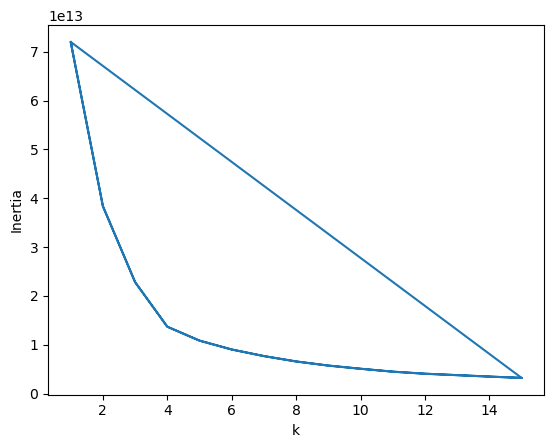

In [6]:
#Convert ‘inertiaLst’ to an array called ‘inertiaArr’.

inertiaArr = np.array(inertiaLst).transpose()

#Plot ‘inertiaArr’ with the inertia as a function of the number of clusters

plt.plot(inertiaArr[0], inertiaArr[1])
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()


In [7]:
#From the graph, choose the right value for the number of clusters to set ‘kVal’ variable.

kVal = 4
kmeans = KMeans(n_clusters=kVal, n_init=10)
kmeans.fit(xDf)

#Run the k-means algorithm using the chosen ‘kVal’

KMeans(n_clusters=4, n_init=10)

In [8]:
kmeans.labels_

array([3, 1, 1, ..., 2, 0, 0])

In [9]:
#In ‘xDf’ create a new column, called ‘label’, to store the labels given by the k-means.

xDf['label'] = kmeans.labels_

In [10]:
#In a new ‘outDf’ DataFrame, concatenate ‘xDf’ and the ‘churn ‘ column of ‘inpDf’, using concat().

outDf = pd.concat((xDf, InpDf['churn']), axis=1)
outDf.head()

,credit_score,isCtry1,isCtry2,isFemale,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,label,churn
id,,,,,,,,,,,,,
2381,619,0,1,1,42,2,0.00,1,1,1,101348.88,3,1
2382,608,0,0,1,41,1,83807.86,1,0,1,112542.58,1,0
2383,502,0,1,1,42,8,159660.80,3,1,0,113931.57,1,1
2384,699,0,1,1,39,1,0.00,2,0,0,93826.63,2,0
2385,850,0,0,1,43,2,125510.82,1,1,1,79084.10,0,0


In [11]:
#Save ‘outDf’ in a new csv file, using to_csv

outDf.to_csv(InpPath + 'outFle_BCCP.csv')

In [12]:
#################################################################################################################################################

In [13]:
############################################# Supervised Learning  #############################################################

In [14]:
#Import ‘inpFle_BCCP.csv’ into a Pandas DataFrame, called ‘inpDf’, set the separator as a comma, the header at 0, and the index_col at 0.

# import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

InpPath = "C:/Users/ciana/OneDrive/Documents/DCU/Final Year/MT412 - Professional Business Analytics/"
InpDf = pd.read_csv(InpPath + "inpFle_BCCP.csv", sep=',', header=0, index_col=0)

InpDf

,credit_score,isCtry1,isCtry2,isFemale,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
id,,,,,,,,,,,,
2381,619,0,1,1,42,2,0.00,1,1,1,101348.88,1
2382,608,0,0,1,41,1,83807.86,1,0,1,112542.58,0
2383,502,0,1,1,42,8,159660.80,3,1,0,113931.57,1
2384,699,0,1,1,39,1,0.00,2,0,0,93826.63,0
2385,850,0,0,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12376,771,0,1,0,39,5,0.00,2,1,0,96270.64,0
12377,516,0,1,0,35,10,57369.61,1,1,1,101699.77,0
12378,709,0,1,1,36,7,0.00,1,0,1,42085.58,1


In [15]:
#In a new ‘xDf’ DataFrame, drop the ‘churn’ column.

xDf = InpDf.drop(columns='churn')

In [16]:
#In a new ‘yDf’ DataFrame, only keep the ‘churn’ column.

yDf = InpDf['churn']

In [17]:
#Display the shapes of both ‘xDf’ and ‘yDf’.

print(xDf.shape)
print(yDf.shape)

(10000, 11)
(10000,)


In [18]:
#Use train_test_split to create ‘X_train’, ‘X_test’, ‘y_train’, and ‘y_test’, splitting both ‘xDf’ and yDf’
# With a test_size set at 30% and random_state at 0.

X_train, X_test, y_train, y_test = train_test_split(xDf, yDf, test_size=0.3, random_state=0)

In [19]:
#Display the shapes of ‘X_train’, ‘X_test’, ‘y_train’, and ‘y_test’.

print('Train set')
print(X_train.shape)
print(y_train.shape)

print('Test set')
print(X_test.shape)
print(y_test.shape)

Train set
(7000, 11)
(7000,)
Test set
(3000, 11)
(3000,)


In [20]:
########################################## Algorithms #############################################################
##################################################################################################################

In [21]:
########################################## SVC ##############################################################

#Run an SVC algorithm with C set at 1 and kernel as ‘rbf’
#Using score, display the accuracy of the algorithm.

# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
#rom sklearn import svm
from sklearn.metrics import accuracy_score


## Set the algorithm parameters
clf = svm.SVC(C=1, kernel='rbf')
# Fit the data
clf.fit(X_train, y_train)
# Analyse the output's score
clf.score(X_test, y_test)


0.793

In [22]:
#Done using accuracy insyead of score

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.793


In [23]:
#To check the predicting power of the k-means when it generates clusters.

#Compute the k-means with 2 clusters and analyze the accuracy compared to the ‘churn’ variable.

kVal = 2
kmeans = KMeans(n_clusters=kVal, n_init=10)
kmeans.fit(xDf)
accuracy = accuracy_score(InpDf['churn'], kmeans.labels_)
print(f'Accuracy: {accuracy}')



Accuracy: 0.5254


In [24]:
##################################################### Gaussian Naive Bayes ####################################################

In [25]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


# Split between train and test set if you haven't already:
X_train, X_test, y_train, y_test = train_test_split(xDf, yDf, test_size=0.3, random_state=0)

## Set the algorithm parameters
clf = GaussianNB(priors=None)
## Fit the data
clf.fit(X_train, y_train)
## Analyse the output's score
print(clf.score(X_test, y_test))


0.7806666666666666


In [26]:
##################################################### K Nearest Neighbour #####################################################

In [27]:

# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split between train and test set if you haven't already:
X_train, X_test, y_train, y_test = train_test_split(xDf, yDf, test_size=0.3, random_state=0)

## Set the algorithm parameters
clf = KNeighborsClassifier(n_neighbors=3)
## Fit the data
clf.fit(X_train, y_train)
## Analyse the output's score
print(clf.score(X_test, y_test))

0.7273333333333334


In [28]:
##################################################### Decision Trees ##########################################################

In [29]:

# import libraries
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


# Split between train and test set if you haven't already:
X_train, X_test, y_train, y_test = train_test_split(xDf, yDf, test_size=0.3, random_state=0)

## Set the algorithm parameters
clf = DecisionTreeClassifier()
## Fit the data
clf.fit(X_train, y_train)
## Analyse the output's score
print(clf.score(X_test, y_test))

0.7993333333333333


In [30]:
#################################################### Linear Regression #########################################################

# import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression

# Split between train and test set if you haven't already:
X_train, X_test, y_train, y_test = train_test_split(xDf, yDf, test_size=0.3, random_state=0)

## Set the algorithm parameters
clf = LinearRegression()
## Fit the data
clf.fit(X_train, y_train)
## Analyse the output's score
print(clf.score(X_test, y_test))

0.15410903802463072
